<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week11/regression_models_in_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

In [21]:
# Build a custom helper function
def plot_history(history):
  """Takes a keras model learning history and plots each metric."""

  metrics = history.history.keys()

  for metric in metrics:
    if not 'val' in metric:
      plt.plot(history.history[f'{metric}'], label = f'{metric}')
      if f'val_{metric}' in metrics:
        plt.plot(history.history[f'val_{metric}'], label = f'val_{metric}')
      plt.legend()
      plt.title(f'{metric}')
      plt.show()

In [22]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTg36jLawSOgGP9hp0oJ3OYZiHMWbuGLiau-8DMjtcKNv7v9Zy_zFBQs9gZU-44GGeIyfXE2iwo26_z/pub?output=csv'
df = pd.read_csv(url)
df.drop(columns = 'car name', inplace = True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [23]:
# Check for duplicates and missing values
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())

Duplicates: 0
Missing Values: 0


In [24]:
# Set features, target, and split the data
X = df.drop(columns = 'mpg')
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [26]:
# Preprocess the data

# Transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
# Separate the columns
cat_cols = ['cylinders', 'model year', 'origin']
num_cols = X_train.columns.drop(cat_cols)

# Column transformer
preprocessor = make_column_transformer((ohe, cat_cols), (scaler, num_cols))

# Process the data
preprocessor.fit(X_train, y_train)
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

X_train_proc.shape

(294, 25)

In [29]:
# Build the model

# Get the number of nodes for the input layer
input_dim = X_train_proc.shape[1]

# Instantiate a model
model = Sequential()

# Add the layers
model.add(Dense(10, input_dim = input_dim, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                260       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
model.compile(loss = 'mse',
              optimizer = 'adam',
              metrics = [metrics.MeanAbsoluteError(),
                         metrics.RootMeanSquaredError()])

In [31]:
# Fit the model and save the learning histor
history = model.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test),
                    epochs = 100,
                    verbose = 0)

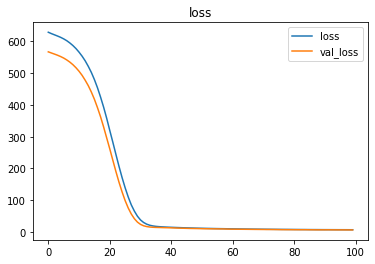

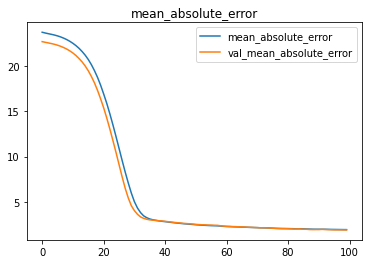

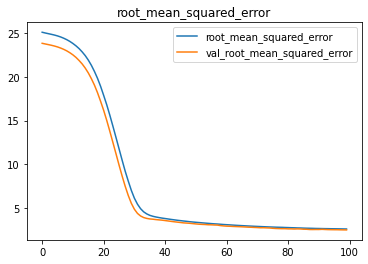

In [32]:
# Plot the learning history
plot_history(history)

In [37]:
# Evaluate the model
y_pred = model.predict(X_test_proc)

print(f'Final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Final R2: {r2_score(y_test, y_pred)}')

Final RMSE: 2.5193474000386606
Final MAE: 1.895656192545988
Final R2: 0.874147934966602
